In [1]:
from music_gan import audio
import matplotlib.pyplot as plt
import torchaudio as th_audio
import torch as th
import pywt
import numpy as np

In [2]:
#wav_p = "/run/media/samuel/M2_Sam_240GB/01 - 7 Minuets, K61b (65a) - I. G Major.flac"

wav_p = "/home/samuel/Musique/Korn_all_flac/01. Here To Stay.flac"

In [4]:
c_a = audio.wav_to_wavelets(wav_p, 1024)
c_a = audio.prepare_wavelets(c_a, 512)

In [5]:
c_a.size()

torch.Size([22, 1, 512, 512])

In [6]:
print(c_a.max()), print(c_a.min())

tensor(1.0000)
tensor(-1.0000)


(None, None)

In [7]:
audio.wavelets_to_wav(c_a, "./out_test_wavelet_funct.wav", 44100)

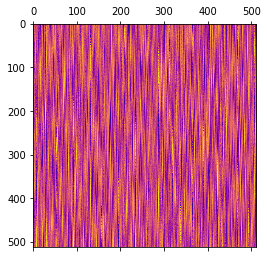

In [10]:
plt.matshow(c_a[1], cmap="plasma")

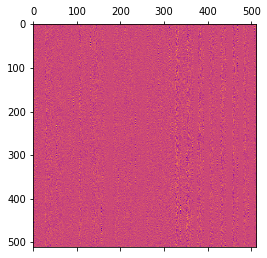

In [22]:
plt.matshow(c_d[1], cmap="plasma")

In [8]:
help(DWT1DForward)

Help on class DWT1DForward in module pytorch_wavelets.dwt.transform1d:

class DWT1DForward(torch.nn.modules.module.Module)
 |  DWT1DForward(J=1, wave='db1', mode='zero')
 |  
 |  Performs a 1d DWT Forward decomposition of an image
 |  
 |  Args:
 |      J (int): Number of levels of decomposition
 |      wave (str or pywt.Wavelet or tuple(ndarray)): Which wavelet to use.
 |          Can be:
 |          1) a string to pass to pywt.Wavelet constructor
 |          2) a pywt.Wavelet class
 |          3) a tuple of numpy arrays (h0, h1)
 |      mode (str): 'zero', 'symmetric', 'reflect' or 'periodization'. The
 |          padding scheme
 |  
 |  Method resolution order:
 |      DWT1DForward
 |      torch.nn.modules.module.Module
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, J=1, wave='db1', mode='zero')
 |      Initializes internal Module state, shared by both nn.Module and ScriptModule.
 |  
 |  forward(self, x)
 |      Forward pass of the DWT.
 |      
 |  

In [29]:
wavelets_forward = DWT1DForward(J=1, wave="db1", mode="zero")

# pywt

In [3]:
raw_audio, sr = th_audio.load(wav_p)
raw_audio_mono = raw_audio.mean(0)

In [4]:
raw_audio_mono.size()

torch.Size([11952276])

In [5]:
nb_vec = 512

raw_audio_mono = raw_audio_mono[raw_audio_mono.size()[0] % nb_vec:]
raw_audio_mono = th.stack(raw_audio_mono.split(nb_vec, dim=0), dim=0)

In [6]:
raw_audio_mono.size()

torch.Size([23344, 512])

In [7]:
wavelet = "db1"

In [97]:
raw_audio_mono.size()

torch.Size([23344, 512])

In [20]:
results = pywt.wavedec(raw_audio_mono.numpy(), wavelet, level=0, mode="symmetric", axis=-1)
cA = results[0]

In [21]:
cA.shape

(23344, 512)

In [23]:
cA.dtype

dtype('float32')

In [24]:
idx = 1000

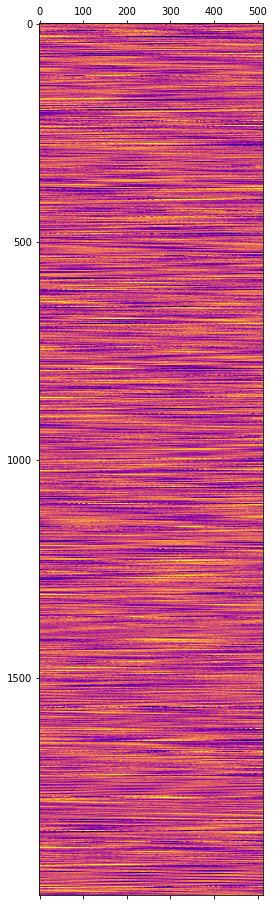

In [25]:
plt.matshow(cA[idx:idx+2000,:], cmap="plasma")

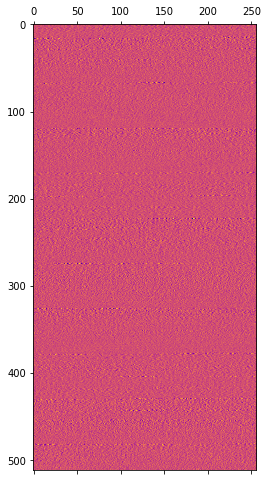

In [104]:
plt.matshow(cD[idx:idx+512, :], cmap="plasma")

In [114]:
res = pywt.idwt(cA, cD, wavelet, mode="zero", axis=-1)

In [115]:
res = res.reshape(-1)

In [116]:
th_audio.save("out_test_wavelet_cD-non-zeros.wav", th.from_numpy(res)[None, :], 44100)

# PyTorch wavelet

In [37]:
nb_vec = 1024

raw_audio_mono = raw_audio_mono[raw_audio_mono.size()[0] % nb_vec:]
raw_audio_mono = th.stack(raw_audio_mono.split(nb_vec, dim=0), dim=0)
raw_audio_mono = raw_audio_mono.unsqueeze(1)


raw_audio_mono.size()

torch.Size([5211, 1, 1024])

In [41]:
res, l = wavelets_forward(raw_audio_mono)

In [49]:
res_transformed = res[res.size()[0]%512:]
res_transformed = th.stack(res_transformed.split(512, dim=0), dim=0).permute(0, 2, 1, 3)

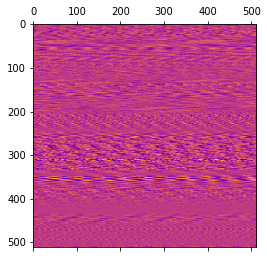

In [50]:
plt.matshow(res_transformed[5, 0], cmap="plasma")

In [47]:
res_transformed.size()

torch.Size([10, 1, 512, 512])

In [6]:
cplx_values = audio.wav_to_stft(
    wav_p
)

In [7]:
magn, phase = audio.stft_to_phase_magn(cplx_values)

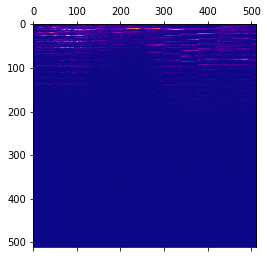

In [10]:
plt.matshow(magn[20], cmap="plasma")

# CWT

In [8]:
wav_p = "/home/samuel/Musique/Korn_all_flac/01. Here To Stay.flac"

In [9]:
raw_audio, _ = th_audio.load(wav_p)

In [10]:
raw_audio_mean = raw_audio.mean(0).numpy()

In [11]:
raw_audio_mean.shape

(11952276,)

In [20]:
res_1, res_2 = pywt.cwt(raw_audio_mean[200000:400000], list(range(1, 513)), "morl", sampling_period=1. / 44100., method="conv")

In [21]:
res_1.shape

(512, 200000)

In [22]:
res_2.shape

(512,)

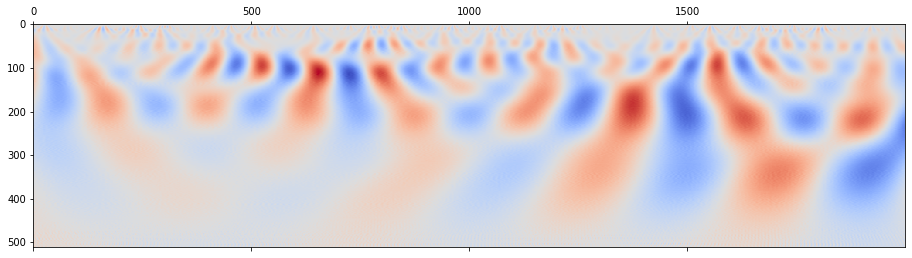

In [23]:
plt.matshow(res_1[:, 102000:104000], cmap="coolwarm")

In [24]:
res_1.shape

(512, 200000)